In [101]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [103]:
train=pd.read_csv("/content/drive/MyDrive/ai-bootcamp-2021/Train.csv")
test=pd.read_csv("/content/drive/MyDrive/ai-bootcamp-2021/Test.csv")
sample=pd.read_csv("/content/drive/MyDrive/ai-bootcamp-2021/SampleSubmission.csv")


In [104]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [105]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [106]:
sample.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [107]:
train.shape,test.shape,sample.shape 

((1568, 27), (672, 26), (672, 2))

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [110]:
train.isnull().sum().any()

True

In [111]:
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [112]:
test.isnull().sum().any()

True

In [113]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

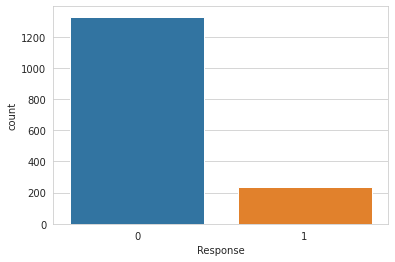

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Response',data=train)

In [115]:
train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

In [116]:
train['Any_Complain'].value_counts()

0    1555
1      13
Name: Any_Complain, dtype: int64

In [117]:
train['Education_Level'].value_counts()

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64

In [118]:
y=train['Response']
del train['Response']

In [119]:
train['splitter']="train"
test['splitter']="test"

In [120]:
data=pd.concat([train,test]).reset_index(drop=True)


In [121]:
data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,splitter
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,train
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,train
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,train
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,train
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,train


In [122]:
data.shape 

(2240, 27)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   object 
 1   Year_of_Birth            2240 non-null   int64  
 2   Education_Level          2240 non-null   object 
 3   Marital_Status           2240 non-null   object 
 4   Disposable_Income        2216 non-null   float64
 5   No_of_Kids_in_home       2240 non-null   int64  
 6   No_of_Teen_in_home       2240 non-null   int64  
 7   Date_Customer            2240 non-null   object 
 8   Recency                  2240 non-null   int64  
 9   Discounted_Purchases     2240 non-null   int64  
 10  WebPurchases             2240 non-null   int64  
 11  CatalogPurchases         2240 non-null   int64  
 12  StorePurchases           2240 non-null   int64  
 13  Amount_on_Wines          2240 non-null   int64  
 14  Amount_on_Fruits        

In [124]:
del data['Date_Customer']

In [125]:
data['Education_Level'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education_Level, dtype: int64

In [126]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [127]:
data_=pd.get_dummies(data['Education_Level'])
data=pd.concat([data.drop('Education_Level',axis=1),data_],axis=1)

In [128]:
data.head()

,ID,Year_of_Birth,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,splitter,2n Cycle,Basic,Graduation,Master,PhD
0,ID_4A9AR6FQ,1955,Divorced,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,train,0,0,1,0,0
1,ID_X28T3VEK,1958,Together,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,train,0,0,1,0,0
2,ID_AWXARH57,1962,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,train,0,0,1,0,0
3,ID_FQVZHE81,1979,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,train,1,0,0,0,0
4,ID_QVLWGPRN,1959,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,train,0,0,1,0,0


In [129]:
data_2=pd.get_dummies(data['Marital_Status'])
data=pd.concat([data.drop('Marital_Status',axis=1),data_2],axis=1)

In [130]:
data.head()

,ID,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,splitter,2n Cycle,Basic,Graduation,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,ID_4A9AR6FQ,1955,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,train,0,0,1,0,0,0,0,1,0,0,0,0,0
1,ID_X28T3VEK,1958,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,train,0,0,1,0,0,0,0,0,0,0,1,0,0
2,ID_AWXARH57,1962,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,train,0,0,1,0,0,0,0,0,0,1,0,0,0
3,ID_FQVZHE81,1979,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,train,1,0,0,0,0,0,0,0,0,1,0,0,0
4,ID_QVLWGPRN,1959,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,train,0,0,1,0,0,0,0,0,1,0,0,0,0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   object 
 1   Year_of_Birth            2240 non-null   int64  
 2   Disposable_Income        2216 non-null   float64
 3   No_of_Kids_in_home       2240 non-null   int64  
 4   No_of_Teen_in_home       2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   Discounted_Purchases     2240 non-null   int64  
 7   WebPurchases             2240 non-null   int64  
 8   CatalogPurchases         2240 non-null   int64  
 9   StorePurchases           2240 non-null   int64  
 10  Amount_on_Wines          2240 non-null   int64  
 11  Amount_on_Fruits         2240 non-null   int64  
 12  Amount_on_MeatProducts   2240 non-null   int64  
 13  Amount_on_FishProducts   2240 non-null   int64  
 14  Amount_on_SweetProducts 

In [132]:
data.isnull().sum()

ID                          0
Year_of_Birth               0
Disposable_Income          24
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
splitter                    0
2n Cycle                    0
Basic                       0
Graduation                  0
Master                      0
PhD                         0
Absurd                      0
Alone                       0
Divorced                    0
Married                     0
Single    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


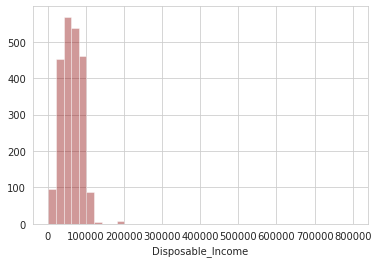

In [133]:
sns.distplot(data['Disposable_Income'].dropna(),kde=False,color='darkred',bins=40)

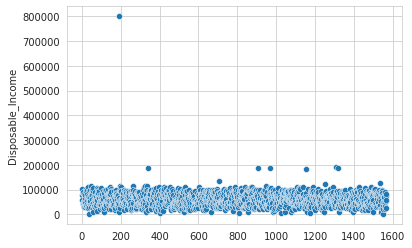

In [134]:
sns.scatterplot(data=train['Disposable_Income'])

In [135]:
data['Disposable_Income'].describe()

count      2216.000000
mean      62696.701625
std       30207.691993
min        2076.000000
25%       42363.600000
50%       61657.800000
75%       82226.400000
max      799999.200000
Name: Disposable_Income, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


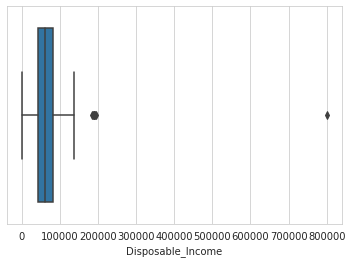

In [136]:
sns.boxplot(data['Disposable_Income'])

In [137]:
data['Disposable_Income']=data['Disposable_Income'].fillna(data['Disposable_Income'].median())

In [138]:
data.isnull().sum()

ID                         0
Year_of_Birth              0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
splitter                   0
2n Cycle                   0
Basic                      0
Graduation                 0
Master                     0
PhD                        0
Absurd                     0
Alone                      0
Divorced                   0
Married                    0
Single                     0
Together      

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   object 
 1   Year_of_Birth            2240 non-null   int64  
 2   Disposable_Income        2240 non-null   float64
 3   No_of_Kids_in_home       2240 non-null   int64  
 4   No_of_Teen_in_home       2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   Discounted_Purchases     2240 non-null   int64  
 7   WebPurchases             2240 non-null   int64  
 8   CatalogPurchases         2240 non-null   int64  
 9   StorePurchases           2240 non-null   int64  
 10  Amount_on_Wines          2240 non-null   int64  
 11  Amount_on_Fruits         2240 non-null   int64  
 12  Amount_on_MeatProducts   2240 non-null   int64  
 13  Amount_on_FishProducts   2240 non-null   int64  
 14  Amount_on_SweetProducts 

In [140]:
train=data[data['splitter']=="train"]
test=data[data['splitter']=="test"]


In [141]:
del train['ID']
del train['splitter']
del test['ID']
del test['splitter']


In [142]:
train.shape,test.shape 

((1568, 35), (672, 35))

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,y,random_state=42,test_size=0.01)

In [144]:
from collections import Counter 
Counter(y_train)

Counter({0: 1315, 1: 237})

In [145]:
class_weights=int((y_train.value_counts()[0]/(y_train.value_counts()[1])))

In [146]:
class_weights

5

In [99]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=42,scale_pos_weight=class_weights)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=1, verbosity=1)

In [100]:
y_preds=model.predict(x_test)

In [147]:
from sklearn.metrics import f1_score

In [148]:
print("Train score :",model.score(x_train,y_train))
print("Test score:",model.score(x_test,y_test))

Train score : 0.9207474226804123
Test score: 1.0


In [149]:
F1_score=f1_score(y_preds,y_test)
F1_score

1.0

In [150]:
predictions=model.predict(test)

In [151]:
sample.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [152]:
sample['Response']=predictions

In [153]:
sample.to_csv("DSN21_solution_2.csv",index=False)